In [1]:
import pandas as pd
# upload Training.csv and Test.csv from the kaggle competition!
Training_Data = pd.read_csv('Training.csv')
Testing_Data = pd.read_csv('Test.csv')

In [2]:
#All the required library importing
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#Preprocessing data
def data_encoder(dataset):
  dataset['category'] = dataset.category.astype('category')
  dataset['vote'] = np.where(np.isfinite(dataset.vote),dataset.vote,-1)
  dataset['vote'] = dataset.vote.astype('int')
  return dataset

In [4]:
#New dataframes with processed features
def create_dataframe(dataset, train = True):
    dataframe = pd.DataFrame(
    {'summary': dataset['summary'],
    'reviewText': dataset['reviewText'],
    'category': dataset['category'],
    'vote': dataset['vote']})

    if train == True :
      dataframe['overall'] = dataset['overall']
    dataframe = dataframe.replace(np.nan, '')
    return dataframe

In [5]:
#Column transofrmer: to process the different features
from sklearn.compose import ColumnTransformer
#CountVectorizer:for text features
from sklearn.feature_extraction.text import CountVectorizer
#OneHotEncoder: for everything else
from sklearn.preprocessing import OneHotEncoder

column_trans = ColumnTransformer([
    ('summary_tf', CountVectorizer(),'summary'),
    ('review_tf', CountVectorizer(),'reviewText'),
    ('category_tf', OneHotEncoder(dtype='int',handle_unknown='ignore'),['category']),
    ('vote_tf', OneHotEncoder(dtype='int',handle_unknown='ignore'),['vote'])],remainder='passthrough', verbose_feature_names_out=True)

In [6]:
#Model-1 (tuned hyper-parameters)
from sklearn.linear_model import LogisticRegression
LogRegCLF_1 = LogisticRegression(random_state=2, solver='saga', C=0.5, penalty='elasticnet', l1_ratio=0.7, multi_class='multinomial')

In [7]:
#Model-2 (tuned hyper-parameters)
from sklearn.tree import DecisionTreeClassifier
DecTreeCLF_2 = DecisionTreeClassifier(random_state=2, max_depth = None, splitter='random')

In [8]:
#Model-3 (tuned hyper-parameters)
from sklearn.ensemble import RandomForestClassifier
RanForestCLF_3 = RandomForestClassifier(max_depth = 10, max_features = 'sqrt')

In [9]:
#Pipelines: to give preeprocessed data to Classifiers
from sklearn.pipeline import Pipeline

CLFPipeline_1 = Pipeline(steps=[
    ('column_trans', column_trans),
    ('model', LogRegCLF_1)
])

CLFPipeline_2 = Pipeline(steps=[
    ('column_trans', column_trans),
    ('model', DecTreeCLF_2)
])

CLFPipeline_3 = Pipeline(steps=[
    ('column_trans', column_trans),
    ('model', RanForestCLF_3)
])

In [10]:
from sklearn.model_selection import train_test_split

TrainingDF = create_dataframe(data_encoder(Training_Data), train=True)
X = TrainingDF[['summary','reviewText','vote','category']]
y = TrainingDF['overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [11]:
#Printing values from each pipleine
print(CLFPipeline_1.get_params())
print(CLFPipeline_2.get_params())
print(CLFPipeline_3.get_params())

{'memory': None, 'steps': [('column_trans', ColumnTransformer(remainder='passthrough',
                  transformers=[('summary_tf', CountVectorizer(), 'summary'),
                                ('review_tf', CountVectorizer(), 'reviewText'),
                                ('category_tf',
                                 OneHotEncoder(dtype='int',
                                               handle_unknown='ignore'),
                                 ['category']),
                                ('vote_tf',
                                 OneHotEncoder(dtype='int',
                                               handle_unknown='ignore'),
                                 ['vote'])])), ('model', LogisticRegression(C=0.5, l1_ratio=0.7, multi_class='multinomial',
                   penalty='elasticnet', random_state=2, solver='saga'))], 'verbose': False, 'column_trans': ColumnTransformer(remainder='passthrough',
                  transformers=[('summary_tf', CountVectorizer(), 'summar

In [12]:
#Grids for tuning (hyper-parameters)
GridParameters_1 = {'model__C' : [0.5,1.2,1.8],'model__penalty' : ['elasticnet', 'l2']}
GridParameters_2 = {'model__splitter' : ['best', 'random'],'model__max_depth' : [None,5,12]}
GridParameters_3 = {'model__max_depth' : [2,5,9],'model__max_features' : ['sqrt', 0.3]}

In [13]:
#Grid Search CV ---> hyper parameter tuning
from sklearn.model_selection import GridSearchCV

def perform_gridsearch_THP(pipeline, grid_params, model):
  GridSearch = GridSearchCV(pipeline, grid_params, scoring='accuracy', verbose=3)
  GridSearch.fit(X_train, y_train)

  print("Best Score: "+str(GridSearch.best_score_))
  print("Best Parameters: "+str(GridSearch.best_params_))
  print("Test Score: "+str(GridSearch.score(X_test,y_test)))

  return GridSearch

In [14]:
GridSearch_1= perform_gridsearch_THP(CLFPipeline_1, GridParameters_1, 'Logistic Regression')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END model__C=0.5, model__penalty=elasticnet;, score=0.569 total time= 5.5min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END model__C=0.5, model__penalty=elasticnet;, score=0.576 total time= 5.6min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END model__C=0.5, model__penalty=elasticnet;, score=0.556 total time= 5.6min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END model__C=0.5, model__penalty=elasticnet;, score=0.562 total time= 5.5min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END model__C=0.5, model__penalty=elasticnet;, score=0.559 total time= 5.6min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5] END ...model__C=0.5, model__penalty=l2;, score=0.571 total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...model__C=0.5, model__penalty=l2;, score=0.579 total time=   9.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...model__C=0.5, model__penalty=l2;, score=0.556 total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...model__C=0.5, model__penalty=l2;, score=0.564 total time=   9.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...model__C=0.5, model__penalty=l2;, score=0.564 total time=   9.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END model__C=1.2, model__penalty=elasticnet;, score=0.571 total time=14.3min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END model__C=1.2, model__penalty=elasticnet;, score=0.577 total time=14.4min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END model__C=1.2, model__penalty=elasticnet;, score=0.555 total time=14.2min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END model__C=1.2, model__penalty=elasticnet;, score=0.563 total time=14.2min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END model__C=1.2, model__penalty=elasticnet;, score=0.561 total time=14.3min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...model__C=1.2, model__penalty=l2;, score=0.571 total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...model__C=1.2, model__penalty=l2;, score=0.580 total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...model__C=1.2, model__penalty=l2;, score=0.555 total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...model__C=1.2, model__penalty=l2;, score=0.565 total time=   9.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...model__C=1.2, model__penalty=l2;, score=0.564 total time=   9.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END model__C=1.8, model__penalty=elasticnet;, score=0.571 total time=19.5min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END model__C=1.8, model__penalty=elasticnet;, score=0.579 total time=19.4min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END model__C=1.8, model__penalty=elasticnet;, score=0.556 total time=19.2min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END model__C=1.8, model__penalty=elasticnet;, score=0.564 total time=19.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END model__C=1.8, model__penalty=elasticnet;, score=0.562 total time=19.5min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...model__C=1.8, model__penalty=l2;, score=0.571 total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...model__C=1.8, model__penalty=l2;, score=0.580 total time=   8.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...model__C=1.8, model__penalty=l2;, score=0.555 total time=   9.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...model__C=1.8, model__penalty=l2;, score=0.565 total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...model__C=1.8, model__penalty=l2;, score=0.564 total time=  10.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Score: 0.5668706314463886
Best Parameters: {'model__C': 1.2, 'model__penalty': 'l2'}
Test Score: 0.5743405275779376


In [15]:
GridSearch_2= perform_gridsearch_THP(CLFPipeline_2, GridParameters_2, 'Decision Tree Classifier')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END model__max_depth=None, model__splitter=best;, score=0.468 total time=  19.2s
[CV 2/5] END model__max_depth=None, model__splitter=best;, score=0.464 total time=  19.5s
[CV 3/5] END model__max_depth=None, model__splitter=best;, score=0.457 total time=  20.3s
[CV 4/5] END model__max_depth=None, model__splitter=best;, score=0.451 total time=  19.4s
[CV 5/5] END model__max_depth=None, model__splitter=best;, score=0.459 total time=  20.4s
[CV 1/5] END model__max_depth=None, model__splitter=random;, score=0.469 total time=  19.9s
[CV 2/5] END model__max_depth=None, model__splitter=random;, score=0.477 total time=  21.2s
[CV 3/5] END model__max_depth=None, model__splitter=random;, score=0.446 total time=  21.0s
[CV 4/5] END model__max_depth=None, model__splitter=random;, score=0.460 total time=  19.2s
[CV 5/5] END model__max_depth=None, model__splitter=random;, score=0.468 total time=  20.3s
[CV 1/5] END model__max_depth=

In [16]:
GridSearch_3= perform_gridsearch_THP(CLFPipeline_3, GridParameters_3, 'Random Forest Classifier')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END model__max_depth=2, model__max_features=sqrt;, score=0.393 total time=   3.0s
[CV 2/5] END model__max_depth=2, model__max_features=sqrt;, score=0.411 total time=   2.3s
[CV 3/5] END model__max_depth=2, model__max_features=sqrt;, score=0.325 total time=   2.2s
[CV 4/5] END model__max_depth=2, model__max_features=sqrt;, score=0.373 total time=   2.4s
[CV 5/5] END model__max_depth=2, model__max_features=sqrt;, score=0.416 total time=   2.9s
[CV 1/5] END model__max_depth=2, model__max_features=0.3;, score=0.416 total time=   6.7s
[CV 2/5] END model__max_depth=2, model__max_features=0.3;, score=0.363 total time=   5.5s
[CV 3/5] END model__max_depth=2, model__max_features=0.3;, score=0.376 total time=   5.8s
[CV 4/5] END model__max_depth=2, model__max_features=0.3;, score=0.388 total time=   5.1s
[CV 5/5] END model__max_depth=2, model__max_features=0.3;, score=0.354 total time=   5.8s
[CV 1/5] END model__max_depth=5, mo

In [17]:
#Model fitting-1
CLFPipeline_1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('summary_tf',
                                                  CountVectorizer(),
                                                  'summary'),
                                                 ('review_tf',
                                                  CountVectorizer(),
                                                  'reviewText'),
                                                 ('category_tf',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['category']),
                                                 ('vote_tf',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['vote'])])),
                ('model',
                 LogisticRegression(C=0.5, l1_ratio=0.7,
                                    multi_class='multinomial',
                                    penalty='elasticnet', random_state=2,
                                    solver='saga'))])

In [18]:
#Model fitting-2
CLFPipeline_2.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('summary_tf',
                                                  CountVectorizer(),
                                                  'summary'),
                                                 ('review_tf',
                                                  CountVectorizer(),
                                                  'reviewText'),
                                                 ('category_tf',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['category']),
                                                 ('vote_tf',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['vote'])])),
                ('model',
                 DecisionTreeClassifier(random_state=2, splitter='random'))])

In [19]:
#Model fitting-3
CLFPipeline_3.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('summary_tf',
                                                  CountVectorizer(),
                                                  'summary'),
                                                 ('review_tf',
                                                  CountVectorizer(),
                                                  'reviewText'),
                                                 ('category_tf',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['category']),
                                                 ('vote_tf',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['vote'])])),
                ('model', RandomForestClassifier(max_depth=10))])

In [20]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from IPython.display import display, HTML
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

# Define HTML tags for bold text
BOLD = '<b>'
RESET = '</b>'

#One-vs-Rest multiclass ROC AND ROC curve using micro-averaged----> Code insights from---->https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings 
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

#Calculation of metrics for each model
def metrics_value(model, y_test, y_pred, y_prob, model_pipeline):
  F1_Score = f1_score(y_test, y_pred, average = 'macro')
  Accuracy = accuracy_score(y_test, y_pred)
  y_prob_1 = y_prob[:,0]
  y_prob_2 = y_prob[:,1]
  y_prob_3 = y_prob[:,2]
  y_prob_4 = y_prob[:,3]
  y_prob_5 = y_prob[:,4]
  RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_prob.ravel(),
    name="micro-average OvR",
    color="yellowgreen",
)
  #storing and computing the micro-average ROC Curve
  fpr, tpr = dict(), dict() #storing
  fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_prob.ravel())

  roc_auc = dict() #storing 
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  print('\n')

  #Plotting
  plt.axis("equal")
  plt.xlabel("False-Positive Rate")
  plt.ylabel("True-Positive Rate")
  plt.title("Micro-Averaged ROC")

  fpr_1, tpr_1, thresholds_0 = roc_curve(y_test, y_prob_1, pos_label=1)
  fpr_2, tpr_2, thresholds_0 = roc_curve(y_test, y_prob_2, pos_label=2)
  fpr_3, tpr_3, thresholds_0 = roc_curve(y_test, y_prob_3, pos_label=3)
  fpr_4, tpr_4, thresholds_0 = roc_curve(y_test, y_prob_4, pos_label=4)
  fpr_5, tpr_5, thresholds_0 = roc_curve(y_test, y_prob_5, pos_label=5)

  # Printing the values
  display(HTML(f"{BOLD}Model : {model}{RESET}"))
  display(HTML(f"{BOLD}F1 Score:{RESET} {F1_Score}"))
  display(HTML(f"{BOLD}Accuracy:{RESET} {Accuracy}"))
  display(HTML(f"{BOLD}\n Micro-Averaged One V/S Rest ROC AUC score:\n{RESET} {roc_auc['micro']:.2f}"))
  
  plt.plot(fpr_1, tpr_1, color='yellowgreen', label=f'ROC Curve --> Class 1')
  plt.plot(fpr_2, tpr_2, color='violet', label=f'ROC Curve --> Class 2')
  plt.plot(fpr_3, tpr_3, color='pink', label=f'ROC Curve --> Classs 3')
  plt.plot(fpr_4, tpr_4, color='lavender', label=f'ROC Curve --> Class 4')
  plt.plot(fpr_5, tpr_5, color='crimson', label=f'ROC Curve --> Class 5')

  plt.plot([0, 1], [0, 1])
  plt.xlabel('False-Positive Rate')
  plt.ylabel('True-Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show() 

  print('\n')
  #Confusion Matrix
  disp = ConfusionMatrixDisplay.from_estimator(
          model_pipeline,
          X_test,
          y_test,
          display_labels=[1,2,3,4,5],
          cmap=plt.cm.Greens
      )
  plt.title("Confusion Matrix")
  plt.show()

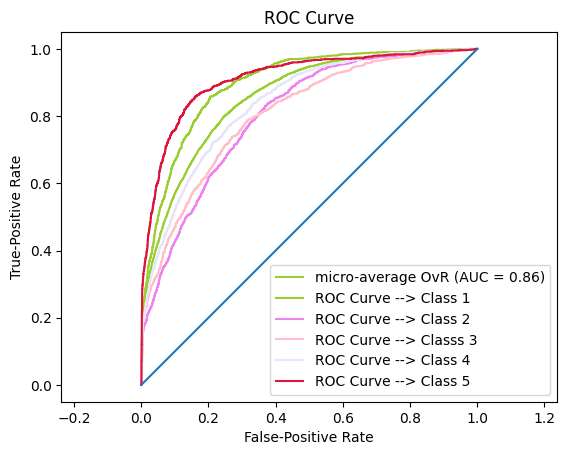

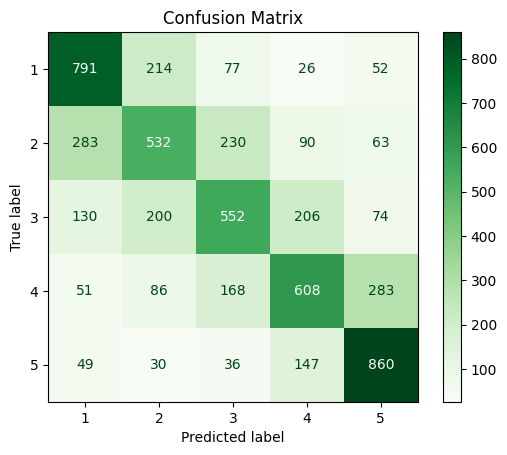

In [21]:
#Predicting the overall score from the test data
y_PredictionModel_1 = CLFPipeline_1.predict(X_test)
y_ProbModel_1 = CLFPipeline_1.predict_proba(X_test)
metrics_value("Logistic Regression", y_test,y_PredictionModel_1,y_ProbModel_1, CLFPipeline_1)

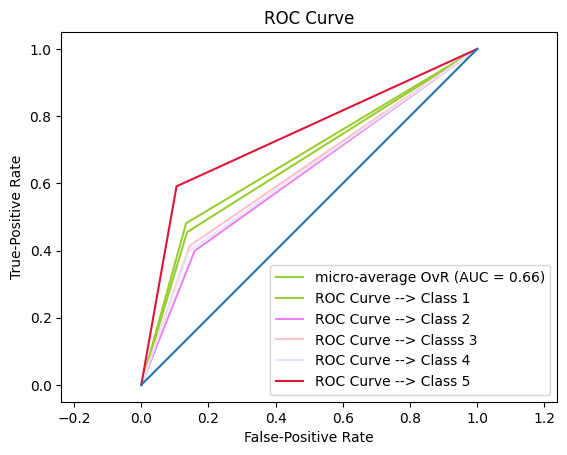

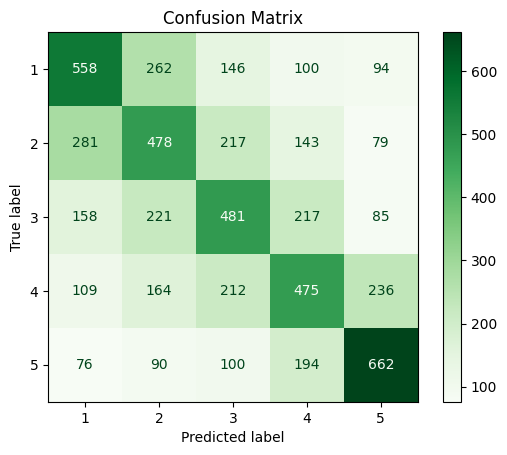

In [22]:
#Predicting the overall score from the test data
y_PredictionModel_2 = CLFPipeline_2.predict(X_test)
y_ProbModel_2 = CLFPipeline_2.predict_proba(X_test)
metrics_value("Decision Tree Classifier", y_test,y_PredictionModel_2,y_ProbModel_2, CLFPipeline_2)

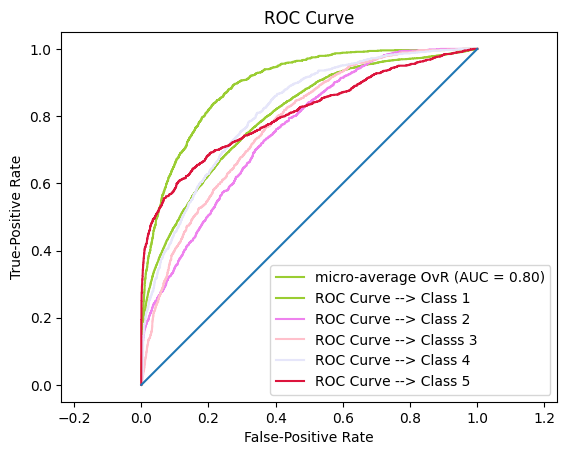

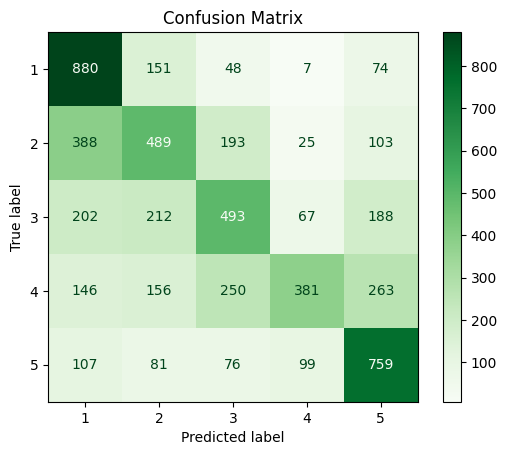

In [23]:
#Predicting the overall score from the test data
y_PredictionModel_3 = CLFPipeline_3.predict(X_test)
y_ProbModel_3 = CLFPipeline_3.predict_proba(X_test)
metrics_value("Random Forest Classifier", y_test,y_PredictionModel_3,y_ProbModel_3, CLFPipeline_3)

In [24]:
#Cleaning the test data
Test_DataFrame = create_dataframe(data_encoder(Testing_Data), train=False)
Test_DataFrame = Test_DataFrame.replace(np.nan, '')

#Predictions for test data
test_predictions = CLFPipeline_1.predict(Test_DataFrame)

In [25]:
# IMPORTANT: use 'id' and 'predicted' as the column names
test_ids = list(Test_DataFrame.index) # the 'id' column name is the index of the test samples

In [26]:
test_submission = pd.DataFrame({'id':test_ids, 'label':test_predictions})
print(test_submission.shape) # should be (4500, 2)
test_submission.head()

(4500, 2)


,id,label
0,0,1
1,1,1
2,2,1
3,3,1
4,4,2


In [27]:
test_submission.to_csv('test_submission_multiclass_final.csv', index=False)